<a href="https://colab.research.google.com/github/eon715/em-info-bound-colab-demo/blob/main/Another_copy_of_toy_em_bound_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
C = 299_792_458.0  # speed of light (used as a scale)

def generate_wave_snapshot(n_points, t, noise_level, seed=0):
    rng = np.random.default_rng(seed)
    x = np.linspace(0, 2*np.pi, n_points, endpoint=False)

    # Toy electric field
    E = np.sin(x - 2*t) + 0.3*np.sin(3*x - t)

    # Toy magnetic field (phase-shifted)
    B = 0.7*np.sin(x - 2*t + np.pi/2) + 0.25*np.sin(3*x - t + np.pi/2)

    # Add noise (this is our sweep knob)
    E += noise_level * rng.standard_normal(n_points)
    B += noise_level * rng.standard_normal(n_points)

    return x, E, B

In [7]:
def info_proxy_entropy(signal, bins=64):
    hist, _ = np.histogram(signal, bins=bins, density=False)
    p = hist.astype(float)
    if p.sum() == 0:
        return 0.0
    p /= p.sum()
    p = p[p > 0]
    return float(-np.sum(p * np.log2(p)))

In [8]:
def bound_margin(E, B, I_proxy, eps=1e-12):
    C_toy = 1.0  # normalized speed for toy model

    E_rms = np.sqrt(np.mean(E**2)) + eps
    B_rms = np.sqrt(np.mean(B**2)) + eps

    allowed_B = (E_rms / C_toy) * np.sqrt(I_proxy + 1.0)
    return allowed_B / B_rms

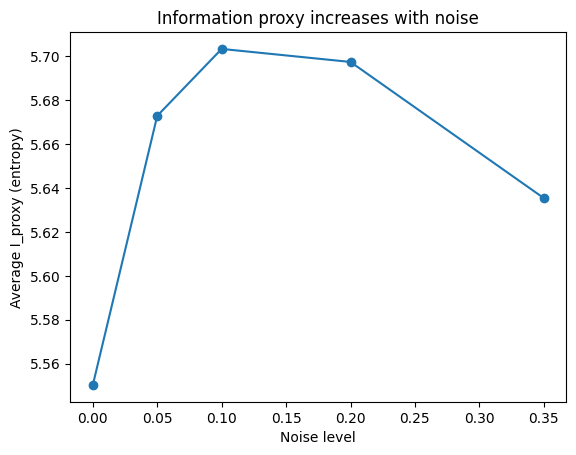

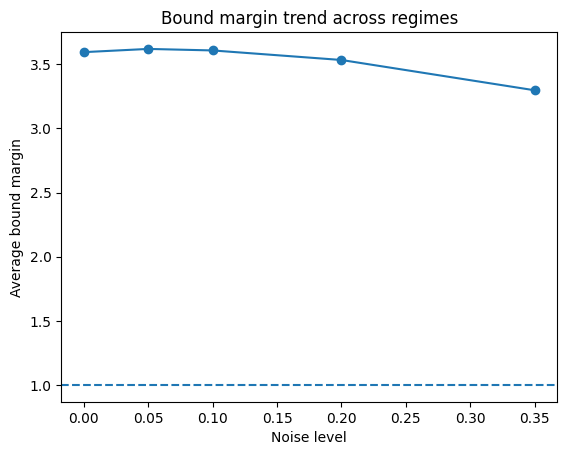

In [9]:
n_points = 512
times = np.linspace(0, 6, 60)
noise_levels = [0.0, 0.05, 0.1, 0.2, 0.35]

avg_I = []
avg_margin = []

for k, noise in enumerate(noise_levels):
    I_vals = []
    m_vals = []
    for t in times:
        _, E, B = generate_wave_snapshot(n_points, t, noise, seed=100+k)
        I = info_proxy_entropy(E)
        m = bound_margin(E, B, I)
        I_vals.append(I)
        m_vals.append(m)
    avg_I.append(np.mean(I_vals))
    avg_margin.append(np.mean(m_vals))

# Plot 1: Information proxy vs noise
plt.figure()
plt.plot(noise_levels, avg_I, marker='o')
plt.xlabel("Noise level")
plt.ylabel("Average I_proxy (entropy)")
plt.title("Information proxy increases with noise")
plt.show()

# Plot 2: Bound margin vs noise
plt.figure()
plt.plot(noise_levels, avg_margin, marker='o')
plt.axhline(1.0, linestyle='--')
plt.xlabel("Noise level")
plt.ylabel("Average bound margin")
plt.title("Bound margin trend across regimes")
plt.show()

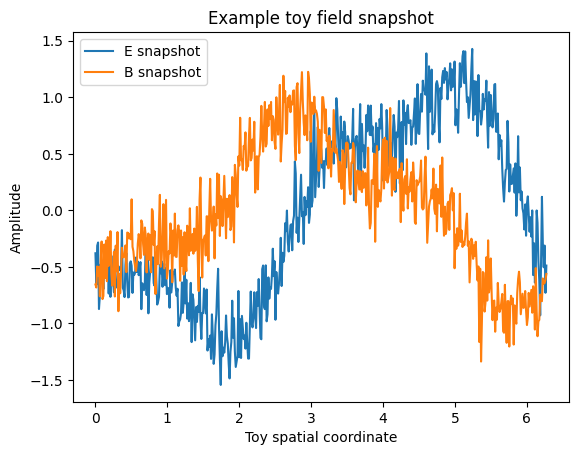

In [10]:
x, E0, B0 = generate_wave_snapshot(512, t=1.5, noise_level=0.2, seed=42)

plt.figure()
plt.plot(x, E0, label="E snapshot")
plt.plot(x, B0, label="B snapshot")
plt.xlabel("Toy spatial coordinate")
plt.ylabel("Amplitude")
plt.title("Example toy field snapshot")
plt.legend()
plt.show()

In [3]:
def generate_wave_snapshot_with_modes(n_points, t, noise_level, n_modes=1, seed=0):
    rng = np.random.default_rng(seed)
    x = np.linspace(0, 2*np.pi, n_points, endpoint=False)

    E = np.zeros_like(x)
    B = np.zeros_like(x)

    for k in range(1, n_modes + 1):
        E += (1.0 / k) * np.sin(k * x - (k + 1) * t)
        B += (0.7 / k) * np.sin(k * x - (k + 1) * t + np.pi/2)

    E += noise_level * rng.standard_normal(n_points)
    B += noise_level * rng.standard_normal(n_points)

    return x, E, B

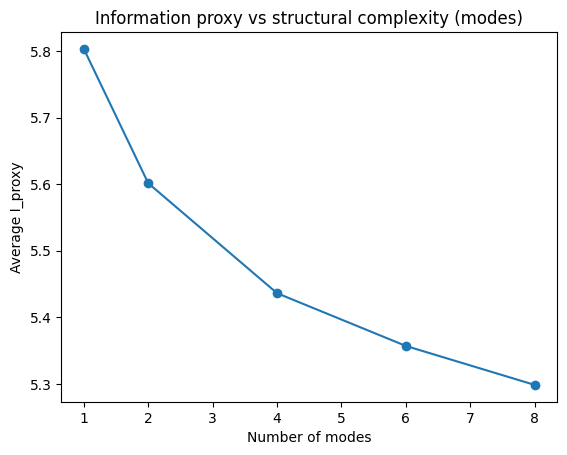

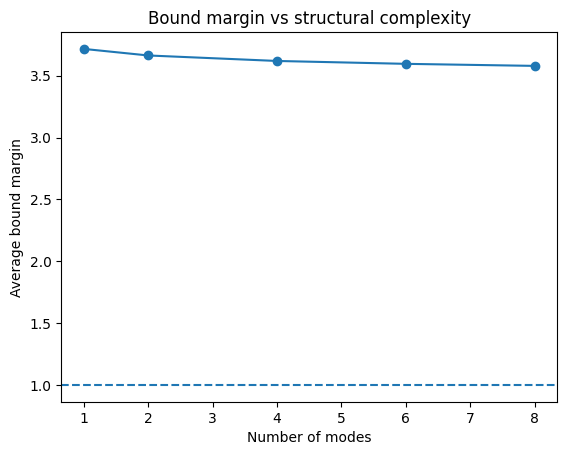

In [11]:
mode_counts = [1, 2, 4, 6, 8]
noise_level = 0.05
times = np.linspace(0, 6, 60)

avg_I_modes = []
avg_margin_modes = []

for m in mode_counts:
    I_vals = []
    m_vals = []
    for t in times:
        _, E, B = generate_wave_snapshot_with_modes(
            n_points=512,
            t=t,
            noise_level=noise_level,
            n_modes=m,
            seed=200+m
        )
        I = info_proxy_entropy(E)
        margin = bound_margin(E, B, I)
        I_vals.append(I)
        m_vals.append(margin)

    avg_I_modes.append(np.mean(I_vals))
    avg_margin_modes.append(np.mean(m_vals))

# Plot: I_proxy vs number of modes
plt.figure()
plt.plot(mode_counts, avg_I_modes, marker='o')
plt.xlabel("Number of modes")
plt.ylabel("Average I_proxy")
plt.title("Information proxy vs structural complexity (modes)")
plt.show()

# Plot: margin vs number of modes
plt.figure()
plt.plot(mode_counts, avg_margin_modes, marker='o')
plt.axhline(1.0, linestyle='--')
plt.xlabel("Number of modes")
plt.ylabel("Average bound margin")
plt.title("Bound margin vs structural complexity")
plt.show()

Plane wave:
  I_proxy = 5.721156296048722
  Bound margin = 3.6963724516525263


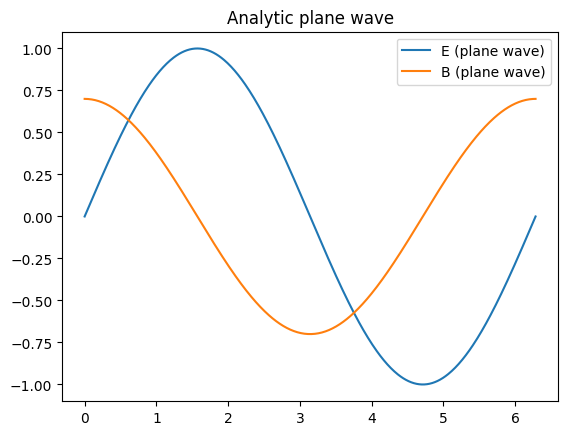

In [12]:
# Analytic plane wave (toy form)

x = np.linspace(0, 2*np.pi, 512)
k = 1.0
omega = 1.0

E_plane = np.sin(k * x)
B_plane = 0.7 * np.sin(k * x + np.pi/2)

I_plane = info_proxy_entropy(E_plane)
margin_plane = bound_margin(E_plane, B_plane, I_plane)

print("Plane wave:")
print("  I_proxy =", I_plane)
print("  Bound margin =", margin_plane)

plt.figure()
plt.plot(x, E_plane, label="E (plane wave)")
plt.plot(x, B_plane, label="B (plane wave)")
plt.title("Analytic plane wave")
plt.legend()
plt.show()

Standing wave:
  I_proxy = 5.721156296048722
  Bound margin = 2.3734134569511225


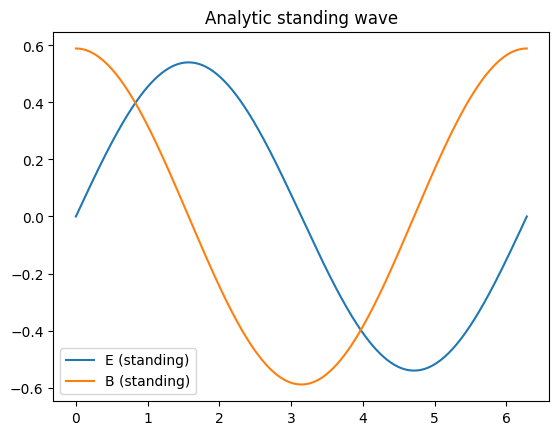

In [13]:
# Analytic standing wave

E_standing = np.sin(x) * np.cos(omega * 1.0)
B_standing = 0.7 * np.cos(x) * np.sin(omega * 1.0)

I_standing = info_proxy_entropy(E_standing)
margin_standing = bound_margin(E_standing, B_standing, I_standing)

print("Standing wave:")
print("  I_proxy =", I_standing)
print("  Bound margin =", margin_standing)

plt.figure()
plt.plot(x, E_standing, label="E (standing)")
plt.plot(x, B_standing, label="B (standing)")
plt.title("Analytic standing wave")
plt.legend()
plt.show()

Two-mode superposition:
  I_proxy = 5.5125306019119815
  Bound margin = 3.6328913345494245


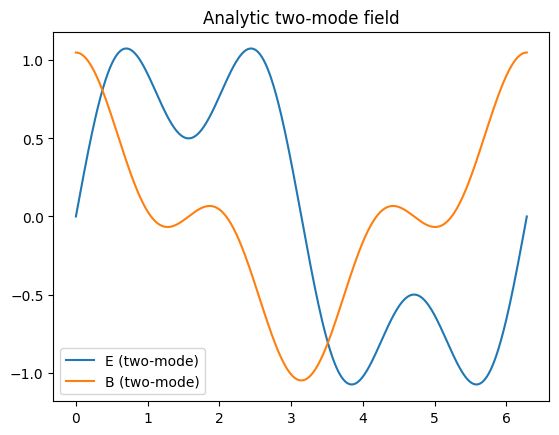

In [14]:
# Analytic two-mode superposition

E_two = np.sin(x) + 0.5 * np.sin(3 * x)
B_two = 0.7 * np.sin(x + np.pi/2) + 0.35 * np.sin(3 * x + np.pi/2)

I_two = info_proxy_entropy(E_two)
margin_two = bound_margin(E_two, B_two, I_two)

print("Two-mode superposition:")
print("  I_proxy =", I_two)
print("  Bound margin =", margin_two)

plt.figure()
plt.plot(x, E_two, label="E (two-mode)")
plt.plot(x, B_two, label="B (two-mode)")
plt.title("Analytic two-mode field")
plt.legend()
plt.show()